# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



In [ ]:
from google.colab import drive
drive.mount("content/")
%cd "content/MyDrive/module17_starter/"

Mounted at content/
/content/content/MyDrive/module17_starter


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.**

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: ylabel='Frequency'>

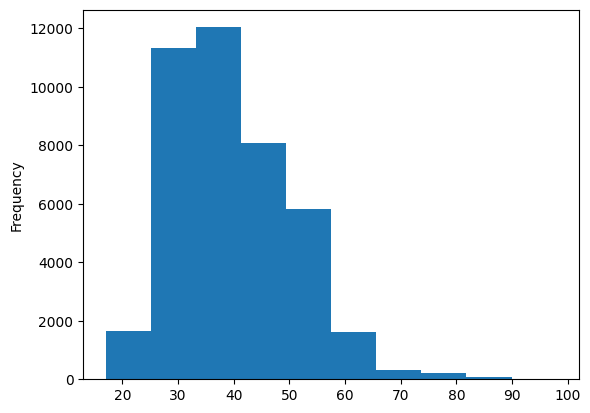

In [ ]:
df['age'].plot(kind='hist')

% Job
job
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: proportion, dtype: float64
Job #
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


Text(0.5, 1.0, 'Job Distribution')

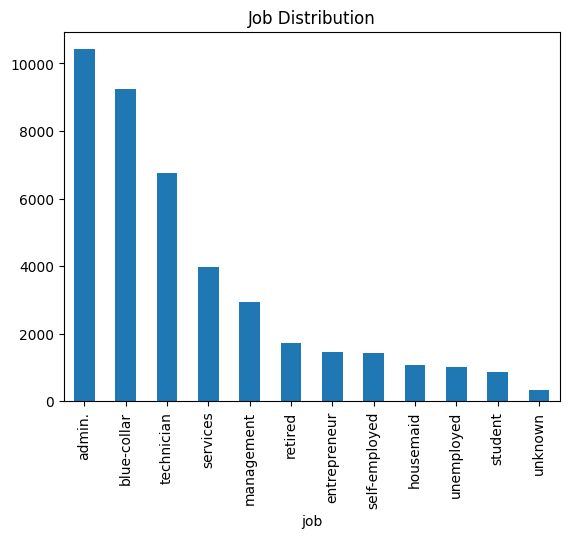

In [ ]:
print("% Job")
print(df['job'].value_counts(normalize=True)*100)
print("Job #")
print(df['job'].value_counts())
df['job'].value_counts().plot(kind="bar")
plt.title("Job Distribution")

% Marital
marital
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: proportion, dtype: float64
Marital #
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


Text(0.5, 1.0, 'Marital Distribution')

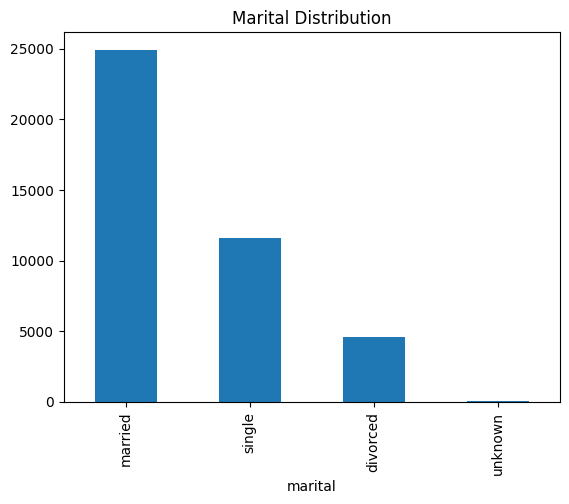

In [ ]:
print("% Marital")
print(df['marital'].value_counts(normalize=True)*100)
print("Marital #")
print(df['marital'].value_counts())
df['marital'].value_counts().plot(kind="bar")
plt.title("Marital Distribution")

% Education
education
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: proportion, dtype: float64
Education #
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


Text(0.5, 1.0, 'Education Distribution')

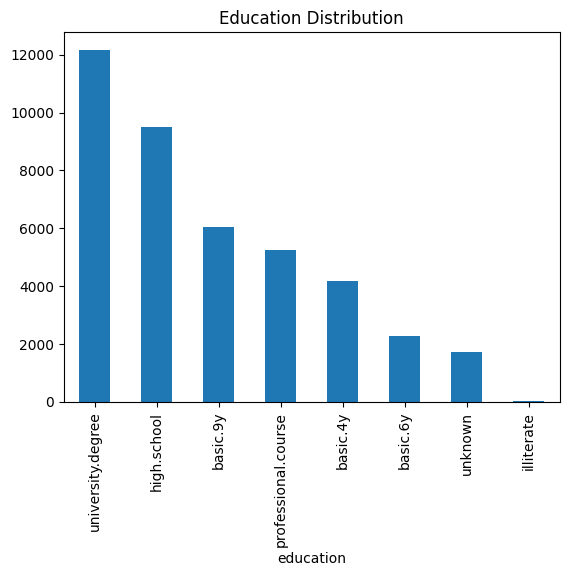

In [ ]:
print("% Education")
print(df['education'].value_counts(normalize=True)*100)
print("Education #")
print(df['education'].value_counts())
df['education'].value_counts().plot(kind="bar")
plt.title("Education Distribution")

% Default
default
no         79.120132
unknown    20.872584
yes         0.007284
Name: proportion, dtype: float64
Default #
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64


Text(0.5, 1.0, 'Default Distribution')

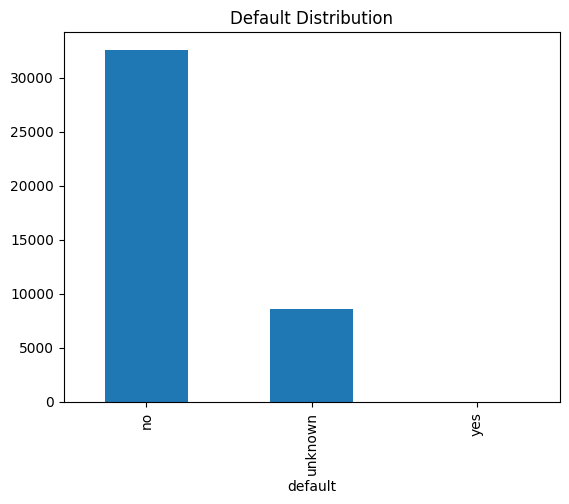

In [ ]:
print("% Default")
print(df['default'].value_counts(normalize=True)*100)
print("Default #")
print(df['default'].value_counts())
df['default'].value_counts().plot(kind="bar")
plt.title("Default Distribution")

**The "default" column has ~20% as "unknown", ~80% as "no", and very small amount as "yes". Since this is imbalanced with the majority as "no" and rest as "unknown", I will drop the "default" column.**

% Housing
housing
yes        52.384190
no         45.212198
unknown     2.403613
Name: proportion, dtype: float64
Housing #
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64


Text(0.5, 1.0, 'Housing Distribution')

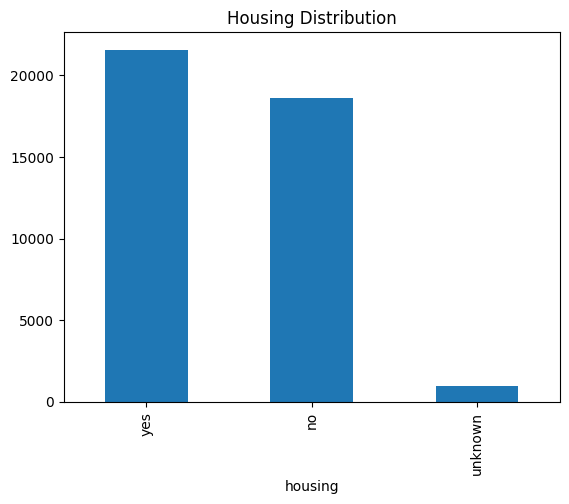

In [ ]:
print("% Housing")
print(df['housing'].value_counts(normalize=True)*100)
print("Housing #")
print(df['housing'].value_counts())
df['housing'].value_counts().plot(kind="bar")
plt.title("Housing Distribution")

% Loan
loan
no         82.426920
yes        15.169467
unknown     2.403613
Name: proportion, dtype: float64
Loan #
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64


Text(0.5, 1.0, 'Loan Distribution')

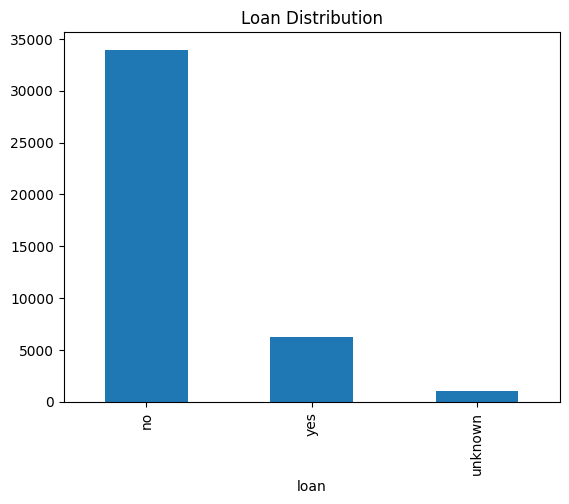

In [ ]:
print("% Loan")
print(df['loan'].value_counts(normalize=True)*100)
print("Loan #")
print(df['loan'].value_counts())
df['loan'].value_counts().plot(kind="bar")
plt.title("Loan Distribution")

% Contact
contact
cellular     63.474798
telephone    36.525202
Name: proportion, dtype: float64
Contact #
contact
cellular     26144
telephone    15044
Name: count, dtype: int64


Text(0.5, 1.0, 'Contact Distribution')

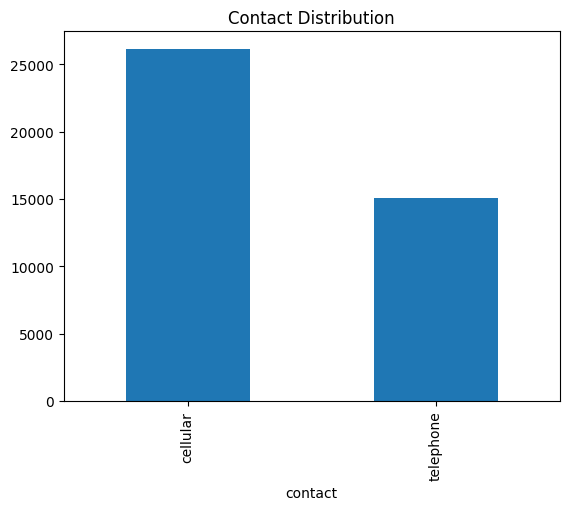

In [ ]:
print("% Contact")
print(df['contact'].value_counts(normalize=True)*100)
print("Contact #")
print(df['contact'].value_counts())
df['contact'].value_counts().plot(kind="bar")
plt.title("Contact Distribution")

% Month
month
may    33.429640
jul    17.417694
aug    14.999514
jun    12.911528
nov     9.956784
apr     6.390211
oct     1.743226
sep     1.383898
mar     1.325629
dec     0.441876
Name: proportion, dtype: float64
Month #
month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64


Text(0.5, 1.0, 'Month Distribution')

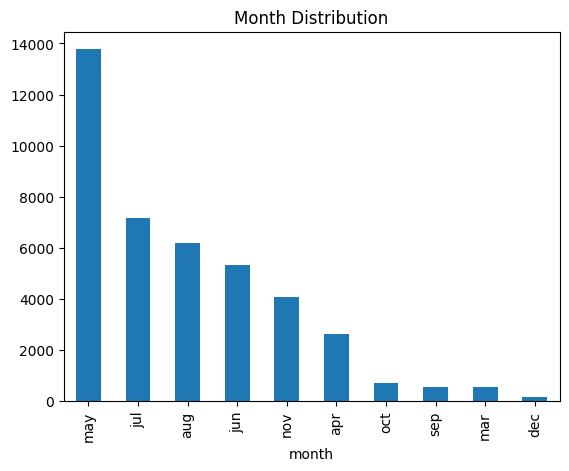

In [ ]:
print("% Month")
print(df['month'].value_counts(normalize=True)*100)
print("Month #")
print(df['month'].value_counts())
df['month'].value_counts().plot(kind="bar")
plt.title("Month Distribution")

% Day_of_week
day_of_week
thu    20.935709
mon    20.671069
wed    19.748470
tue    19.641643
fri    19.003108
Name: proportion, dtype: float64
Day_of_week #
day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64


Text(0.5, 1.0, 'Day_of_week Distribution')

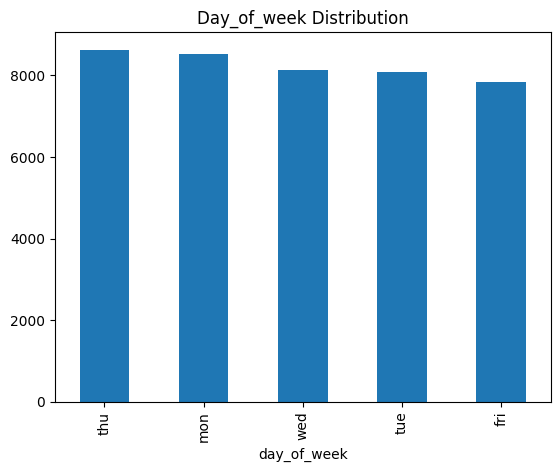

In [ ]:
print("% Day_of_week")
print(df['day_of_week'].value_counts(normalize=True)*100)
print("Day_of_week #")
print(df['day_of_week'].value_counts())
df['day_of_week'].value_counts().plot(kind="bar")
plt.title("Day_of_week Distribution")

Text(0.5, 1.0, 'Duration Distribution')

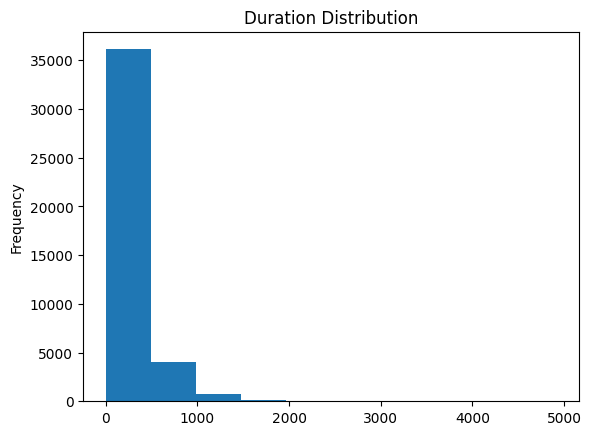

In [ ]:
df['duration'].plot(kind='hist')
plt.title("Duration Distribution")

Text(0.5, 1.0, 'Duration Distribution')

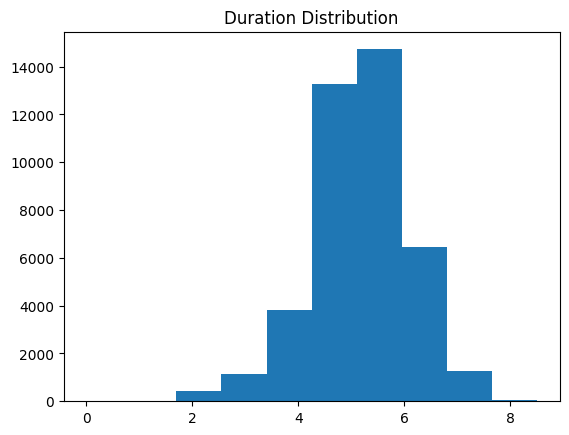

In [ ]:
plt.hist(np.log1p(df['duration']))
plt.title("Duration Distribution")

Text(0.5, 1.0, 'Campaign Distribution')

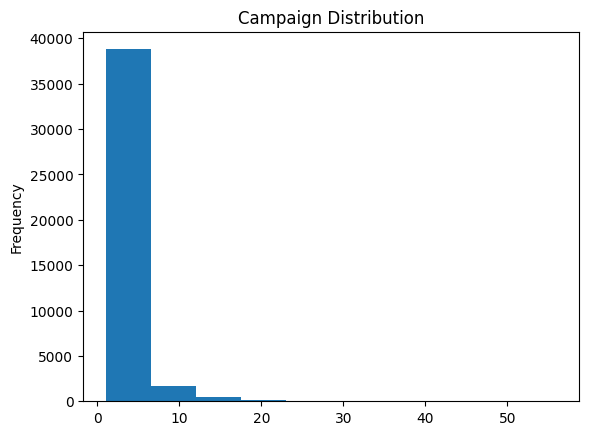

In [ ]:
df['campaign'].plot(kind='hist')
plt.title("Campaign Distribution")

Text(0.5, 1.0, 'Campaign Distribution')

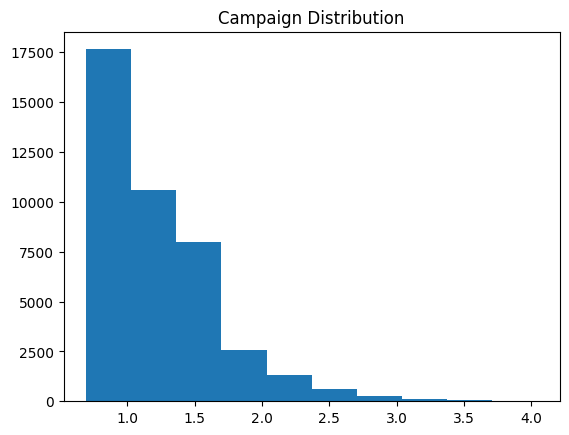

In [ ]:
plt.hist(np.log1p(df['campaign']))
plt.title("Campaign Distribution")

Text(0.5, 1.0, 'Pdays Distribution')

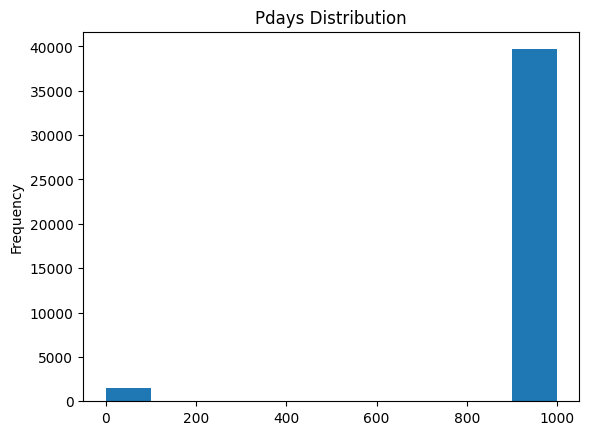

In [ ]:
df['pdays'].plot(kind='hist')
plt.title("Pdays Distribution")

Text(0.5, 1.0, 'Previous Distribution')

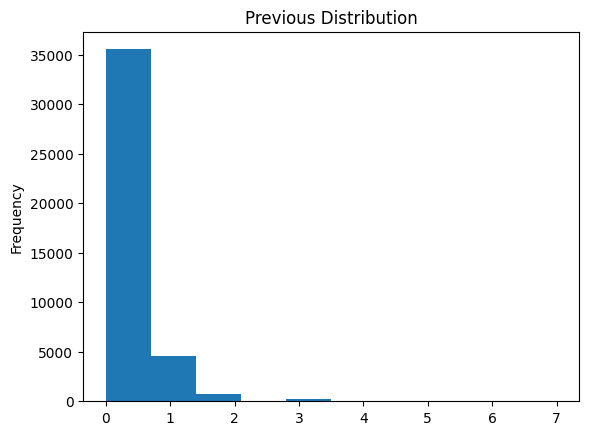

In [ ]:
df['previous'].plot(kind='hist')
plt.title("Previous Distribution")

Text(0.5, 1.0, 'previous Distribution')

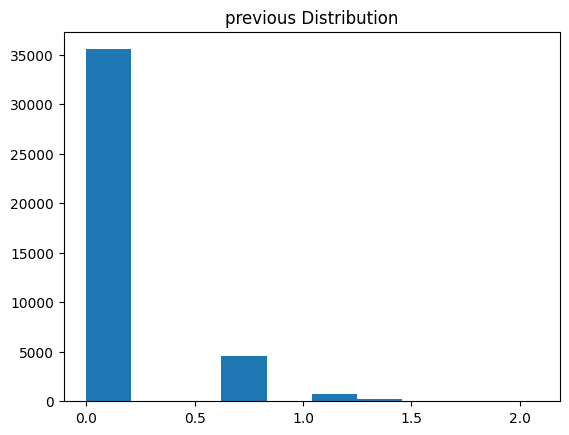

In [ ]:
plt.hist(np.log1p(df['previous']))
plt.title("previous Distribution")

% poutcome
poutcome
nonexistent    86.343110
failure        10.323395
success         3.333495
Name: proportion, dtype: float64
poutcome #
poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64


Text(0.5, 1.0, 'poutcome Distribution')

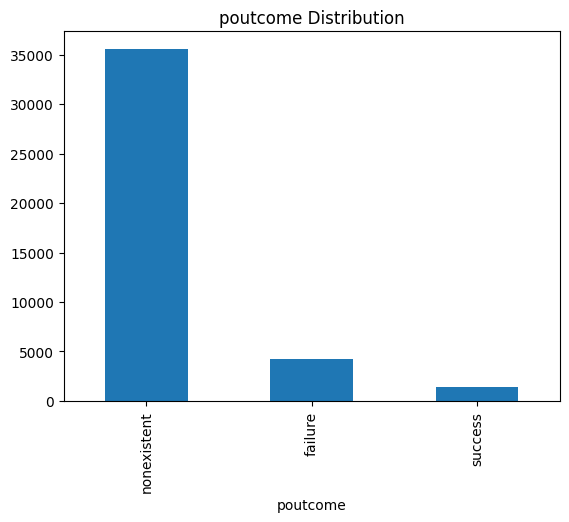

In [ ]:
print("% poutcome")
print(df['poutcome'].value_counts(normalize=True)*100)
print("poutcome #")
print(df['poutcome'].value_counts())
df['poutcome'].value_counts().plot(kind="bar")
plt.title("poutcome Distribution")

Text(0.5, 1.0, 'emp.var.rate Distribution')

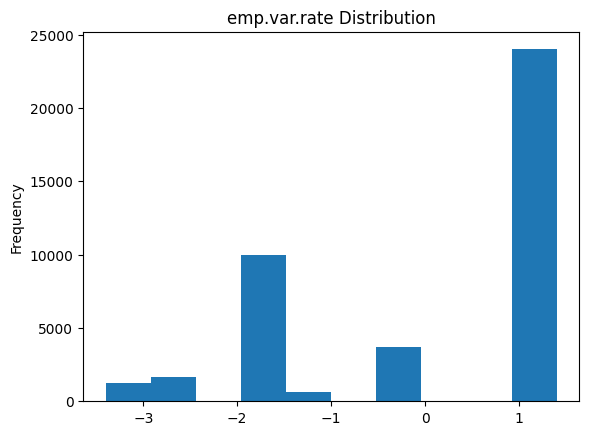

In [ ]:
df['emp.var.rate'].plot(kind='hist')
plt.title("emp.var.rate Distribution")

Text(0.5, 1.0, 'cons.price.idx Distribution')

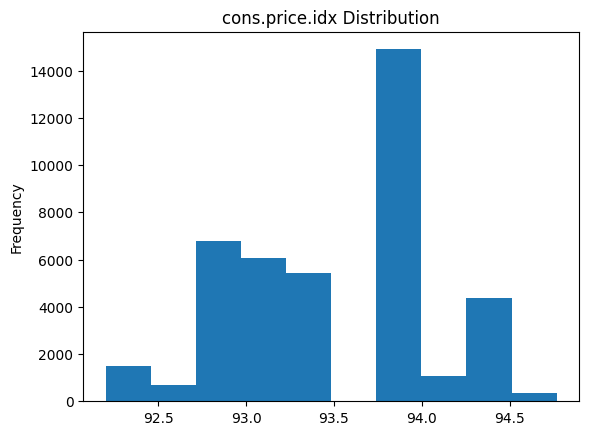

In [ ]:
df['cons.price.idx'].plot(kind='hist')
plt.title("cons.price.idx Distribution")

Text(0.5, 1.0, 'euribor3m Distribution')

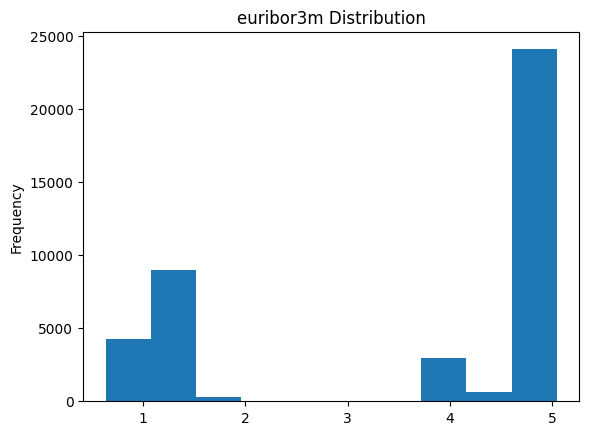

In [ ]:
df['euribor3m'].plot(kind='hist')
plt.title("euribor3m Distribution")

Text(0.5, 1.0, 'nr.employed Distribution')

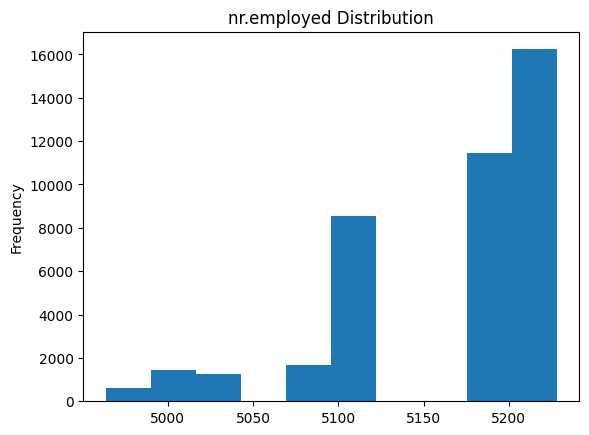

In [ ]:
df['nr.employed'].plot(kind='hist')
plt.title("nr.employed Distribution")

% y
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64
y #
y
no     36548
yes     4640
Name: count, dtype: int64


Text(0.5, 1.0, 'y Distribution')

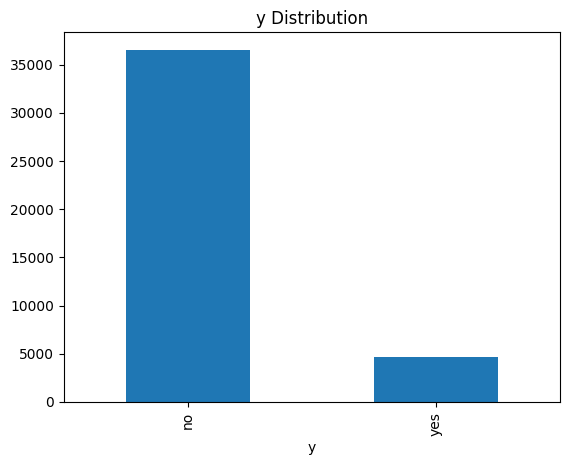

In [ ]:
print("% y")
print(df['y'].value_counts(normalize=True)*100)
print("y #")
print(df['y'].value_counts())
df['y'].value_counts().plot(kind="bar")
plt.title("y Distribution")

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**The overall goal is to be able to lead a successful, targeted campaign by only contacting and allocating resources towards limited clients that are most likely to subscribe to a deposit.**

**The business objective is to determine what factors lead to a successful contact through the creation of a model that predicts the success of a contact with a variety of features.**

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

**We will drop 'duration' because the notes mention that this is highly correlated with output variable and should only be used for benchmarking, not predicting**

**We will drop 'default' as mentioned earlier due to major imbalance and high percentage of 'unknown' values**

In [ ]:
set(df.columns.tolist()) - set(df.select_dtypes('object').columns.tolist())

{'age',
 'campaign',
 'cons.conf.idx',
 'cons.price.idx',
 'duration',
 'emp.var.rate',
 'euribor3m',
 'nr.employed',
 'pdays',
 'previous'}

In [ ]:
X = df[['job', 'marital', 'education','contact', 'month','day_of_week', 'poutcome', 'housing', 'loan', 'age','campaign','cons.conf.idx','cons.price.idx','duration','emp.var.rate','euribor3m','nr.employed','pdays','previous']]
y = df['y']

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = make_column_transformer(
    (OneHotEncoder(), ['job', 'marital', 'education','contact', 'month','day_of_week', 'poutcome']),
    (OrdinalEncoder(), ['housing', 'loan']),
    (StandardScaler(), ['age','campaign','cons.conf.idx','cons.price.idx','duration','emp.var.rate','euribor3m','nr.employed','pdays','previous']),
    remainder='passthrough'
)

In [ ]:
y = LabelEncoder().fit_transform(y)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
baseline_acc = dummy.score(X_test, y_test)
print(f"Baseline Accuracy: {baseline_acc:.3f}")
y_pred = dummy.predict(X_test)

accuracy = accuracy_score(y_test, y_pred,)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Baseline Precision: {:.6f}".format(precision))
print("Baseline Recall: {:.6f}".format(recall))
print("Baseline F1-score: {:.6f}".format(f1))

Baseline Accuracy: 0.888
Baseline Precision: 0.000000
Baseline Recall: 0.000000
Baseline F1-score: 0.000000


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression

In [ ]:
log_reg_pipe = Pipeline ([
    ('transformer', column_transformer),
    ('model', LogisticRegression())
])

log_reg = log_reg_pipe.fit(X_train, y_train)

log_reg_pred = log_reg.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [ ]:
from sklearn import metrics

y_pred_proba = log_reg.predict_proba(X_test)
yes_probs = y_pred_proba[::,1]

In [ ]:
accuracy = accuracy_score(y_test, log_reg_pred)
precision = precision_score(y_test, log_reg_pred)
recall = recall_score(y_test, log_reg_pred)
f1 = f1_score(y_test, log_reg_pred)

print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1-score: {:.6f}".format(f1))

Accuracy: 0.911467
Precision: 0.667804
Recall: 0.422606
F1-score: 0.517637


**The accuracy ~91% of the logistic regression model is higher than the dummy classifier that predicts the most frequent class with accuracy ~88%.**

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time

In [ ]:
results = []

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

In [ ]:
for name, model in models.items():
    pipe = Pipeline([
        ('transformer', column_transformer),
        ('model', model)
    ])

    start = time.time()
    pipe.fit(X_train, y_train)
    end = time.time()

    train_acc = accuracy_score(y_train, pipe.predict(X_train))
    test_acc = accuracy_score(y_test, pipe.predict(X_test))

    results.append({
        'Model': name,
        'Train Time (s)': round(end - start, 2),
        'Train Accuracy': round(train_acc, 3),
        'Test Accuracy': round(test_acc, 3)
    })


results_df = pd.DataFrame(results)
print(results_df)

                 Model  Train Time (s)  Train Accuracy  Test Accuracy
0  Logistic Regression            1.43           0.912          0.911
1                  KNN            0.22           0.927          0.902
2        Decision Tree            0.64           1.000          0.889
3                  SVM           29.80           0.922          0.911


**Logistic regression and SVM had the highest accuracy, but SVM took significantly longer time to train. KNNs were relatively quick to train but had ~1% lower accuracy. Decision trees has the lowest accuracy.**

**Accuracy, however, can be misleading. The target variable y is imbalanced, so it is best to look also at precision, recall, and F1-score to have a clearer picture on overall model performance. I will do this in the next step when improving the model.**

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
results = []

In [ ]:
from sklearn.model_selection import GridSearchCV

pipelines = {
    'log_reg': Pipeline([
        ('transformer', column_transformer),
        ('model', LogisticRegression(max_iter=1000))
    ]),
    'knn': Pipeline([
        ('transformer', column_transformer),
        ('model', KNeighborsClassifier())
    ]),
    'decision_tree': Pipeline([
        ('transformer', column_transformer),
        ('model', DecisionTreeClassifier())
    ]),
    'svm': Pipeline([
        ('transformer', column_transformer),
        ('model', SVC())
    ])
}

In [ ]:
param_grids = {
    'log_reg': {'model__C': [0.01, 0.1, 1, 10]},
    'knn': {'model__n_neighbors': [3, 5, 7, 9]},
    'decision_tree': {'model__max_depth': [3, 5, 7, 10, None]},
    'svm': {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf']
    }
}

In [ ]:
name = 'log_reg'
pipe = pipelines[name]
print(f"Running GridSearchCV for {name}...")
grid = GridSearchCV(pipe, param_grids[name], cv=5, scoring='f1')

start = time.time()
grid.fit(X_train, y_train)
end = time.time()

log_reg_best_model = grid.best_estimator_
best_model = log_reg_best_model

train_acc = accuracy_score(y_train, best_model.predict(X_train))
test_acc = accuracy_score(y_test, best_model.predict(X_test))
y_pred = best_model.predict(X_test)

print("Best parameters found: ", grid.best_params_)
print("Best score achieved: ", grid.best_score_)

results.append({
    'Model': name,
    'Train Time (s)': round(end - start, 2),
    'Train Accuracy': round(train_acc, 3),
    'Test Accuracy': round(test_acc, 3),
    'Precision': round(precision_score(y_test, y_pred), 3),
    'Recall': round(recall_score(y_test, y_pred), 3),
    'F1-score': round(f1_score(y_test, y_pred), 3)
})
results

Running GridSearchCV for log_reg...
Best parameters found:  {'model__C': 10}
Best score achieved:  0.5143749244653875


[{'Model': 'log_reg',
  'Train Time (s)': 21.46,
  'Train Accuracy': 0.912,
  'Test Accuracy': 0.911,
  'Precision': 0.664,
  'Recall': 0.422,
  'F1-score': 0.516}]

In [ ]:
name = 'knn'
pipe = pipelines[name]
print(f"Running GridSearchCV for {name}...")
grid = GridSearchCV(pipe, param_grids[name], cv=5, scoring='f1')

start = time.time()
grid.fit(X_train, y_train)
end = time.time()

knn_best_model = grid.best_estimator_
best_model = knn_best_model

train_acc = accuracy_score(y_train, best_model.predict(X_train))
test_acc = accuracy_score(y_test, best_model.predict(X_test))
y_pred = best_model.predict(X_test)

print("Best parameters found: ", grid.best_params_)
print("Best score achieved: ", grid.best_score_)

results.append({
    'Model': name,
    'Train Time (s)': round(end - start, 2),
    'Train Accuracy': round(train_acc, 3),
    'Test Accuracy': round(test_acc, 3),
    'Precision': round(precision_score(y_test, y_pred), 3),
    'Recall': round(recall_score(y_test, y_pred), 3),
    'F1-score': round(f1_score(y_test, y_pred), 3)
})
results

Running GridSearchCV for knn...
Best parameters found:  {'model__n_neighbors': 7}
Best score achieved:  0.4803821161928803


[{'Model': 'log_reg',
  'Train Time (s)': 21.46,
  'Train Accuracy': 0.912,
  'Test Accuracy': 0.911,
  'Precision': 0.664,
  'Recall': 0.422,
  'F1-score': 0.516},
 {'Model': 'knn',
  'Train Time (s)': 32.57,
  'Train Accuracy': 0.922,
  'Test Accuracy': 0.904,
  'Precision': 0.607,
  'Recall': 0.402,
  'F1-score': 0.484}]

In [ ]:
name = 'decision_tree'
pipe = pipelines[name]
print(f"Running GridSearchCV for {name}...")
grid = GridSearchCV(pipe, param_grids[name], cv=5, scoring='f1')

start = time.time()
grid.fit(X_train, y_train)
end = time.time()

decision_tree_best_model = grid.best_estimator_
best_model = decision_tree_best_model

train_acc = accuracy_score(y_train, best_model.predict(X_train))
test_acc = accuracy_score(y_test, best_model.predict(X_test))
y_pred = best_model.predict(X_test)


print("Best parameters found: ", grid.best_params_)
print("Best score achieved: ", grid.best_score_)

results.append({
    'Model': name,
    'Train Time (s)': round(end - start, 2),
    'Train Accuracy': round(train_acc, 3),
    'Test Accuracy': round(test_acc, 3),
    'Precision': round(precision_score(y_test, y_pred), 3),
    'Recall': round(recall_score(y_test, y_pred), 3),
    'F1-score': round(f1_score(y_test, y_pred), 3)
})
results

Running GridSearchCV for decision_tree...
Best parameters found:  {'model__max_depth': 3}
Best score achieved:  0.5888259877935047


[{'Model': 'log_reg',
  'Train Time (s)': 21.46,
  'Train Accuracy': 0.912,
  'Test Accuracy': 0.911,
  'Precision': 0.664,
  'Recall': 0.422,
  'F1-score': 0.516},
 {'Model': 'knn',
  'Train Time (s)': 32.57,
  'Train Accuracy': 0.922,
  'Test Accuracy': 0.904,
  'Precision': 0.607,
  'Recall': 0.402,
  'F1-score': 0.484},
 {'Model': 'decision_tree',
  'Train Time (s)': 5.12,
  'Train Accuracy': 0.908,
  'Test Accuracy': 0.91,
  'Precision': 0.6,
  'Recall': 0.587,
  'F1-score': 0.594}]

In [ ]:
'''
name = 'svm'
pipe = pipelines[name]
print(f"Running GridSearchCV for {name}...")
grid = GridSearchCV(pipe, param_grids[name], cv=5, scoring='f1')

start = time.time()
grid.fit(X_train, y_train)
end = time.time()

svm_best_model = grid.best_estimator_
best_model = svm_best_model

train_acc = accuracy_score(y_train, best_model.predict(X_train))
test_acc = accuracy_score(y_test, best_model.predict(X_test))
y_pred = best_model.predict(X_test)


print("Best parameters found: ", grid.best_params_)
print("Best score achieved: ", grid.best_score_)

results.append({
    'Model': name,
    'Train Time (s)': round(end - start, 2),
    'Train Accuracy': round(train_acc, 3),
    'Test Accuracy': round(test_acc, 3),
    'Precision': round(precision_score(y_test, y_pred), 3),
    'Recall': round(recall_score(y_test, y_pred), 3),
    'F1-score': round(f1_score(y_test, y_pred), 3)
})
results
'''

Above code took too long to run so decided to use randomizedsearchcv

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

pipelines['svm'] = Pipeline([
    ('transformer', column_transformer),
    ('model', SVC(max_iter=1000, random_state=42, probability=True))
])

param_grids['svm'] = [
    # Linear kernel: only C matters
    {'model__kernel': ['linear'], 'model__C': [0.1, 1, 10]},
    # RBF kernel: test C and gamma
    {'model__kernel': ['rbf'], 'model__C': [0.1, 1, 10], 'model__gamma': ['scale', 'auto']}
]

name = 'svm'
pipe = pipelines[name]
print(f"Running RandomizedSearchCV for {name}...")

grid = RandomizedSearchCV(
    pipe,
    param_distributions=param_grids[name],
    n_iter=6,
    cv=3,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

start = time.time()
grid.fit(X_train, y_train)
end = time.time()

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

train_acc = accuracy_score(y_train, best_model.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

results.append({
    'Model': name,
    'Train Time (s)': round(end - start, 2),
    'Train Accuracy': round(train_acc, 3),
    'Test Accuracy': round(test_acc, 3),
    'Precision': round(precision_score(y_test, y_pred, zero_division=0), 3),
    'Recall': round(recall_score(y_test, y_pred, zero_division=0), 3),
    'F1-score': round(f1_score(y_test, y_pred, zero_division=0), 3)
})

results_df = pd.DataFrame(results)
print("Best parameters found: ", grid.best_params_)
print("Best score achieved: ", grid.best_score_)
print(results_df)


Running RandomizedSearchCV for svm...


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameters found:  {'model__kernel': 'rbf', 'model__gamma': 'scale', 'model__C': 1}
Best score achieved:  0.39554318418415785
           Model  Train Time (s)  Train Accuracy  Test Accuracy  Precision  \
0        log_reg           21.46           0.912          0.911      0.664   
1            knn           32.57           0.922          0.904      0.607   
2  decision_tree            5.12           0.908          0.910      0.600   
3            svm          311.28           0.864          0.858      0.344   

   Recall  F1-score  
0   0.422     0.516  
1   0.402     0.484  
2   0.587     0.594  
3   0.291     0.315  


In [ ]:
results_df

,Model,Train Time (s),Train Accuracy,Test Accuracy,Precision,Recall,F1-score
0,log_reg,21.46,0.912,0.911,0.664,0.422,0.516
1,knn,32.57,0.922,0.904,0.607,0.402,0.484
2,decision_tree,5.12,0.908,0.910,0.600,0.587,0.594
3,svm,311.28,0.864,0.858,0.344,0.291,0.315


**Decision Tree was the fastest among all the models with 91% accuracy. SVM took the most training time.**

**In terms of test accuracy, logistic regression and decision tree has the highest accuracy.**

**Since our target variable is imbalanced, we also look at precision, recall, and F1-score. Logisitc regression has the highest precision. However, decision trees have the highest recall and F1-score. SVM had low precision, recall, and F1-score.**

**Based on this analysis, it looks like decision trees are the strongest in terms of speed, performance, and interpretability. Logistic regression are the second best with also adequate speed and performance.**

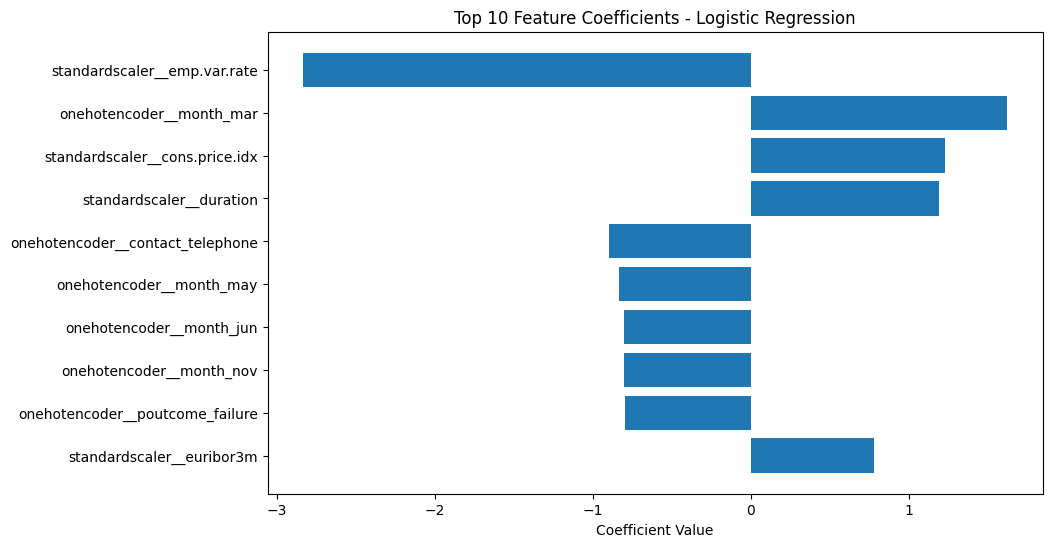

In [ ]:
import matplotlib.pyplot as plt


feature_names = log_reg_best_model.named_steps['transformer'].get_feature_names_out()
coefficients = log_reg_best_model.named_steps['model'].coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)  # sort by magnitude

plt.figure(figsize=(10,6))
plt.barh(coef_df['Feature'][:10], coef_df['Coefficient'][:10])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients - Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

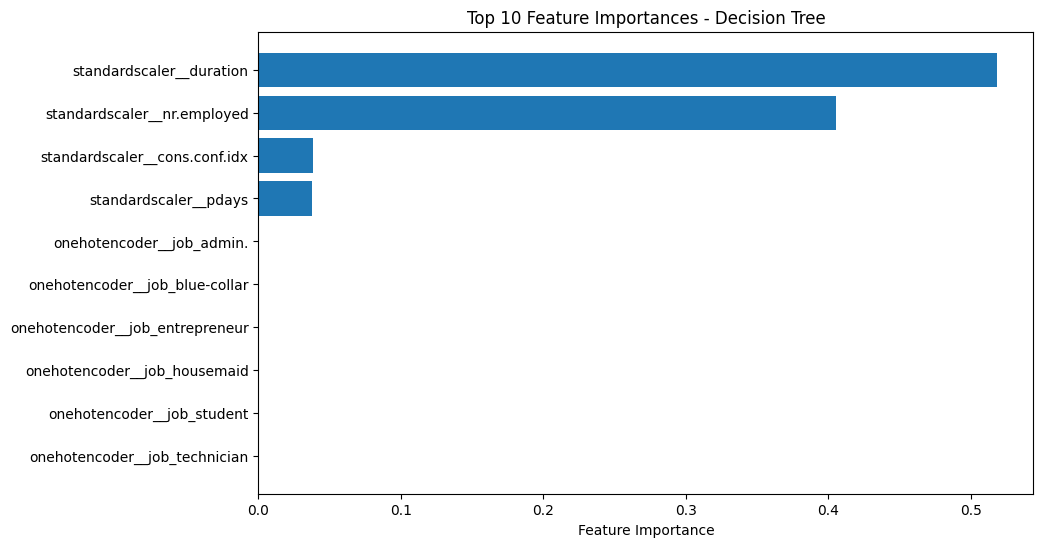

In [ ]:

importances = decision_tree_best_model.named_steps['model'].feature_importances_
feature_names = decision_tree_best_model.named_steps['transformer'].get_feature_names_out()

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - Decision Tree')
plt.gca().invert_yaxis()
plt.show()


## Overall Findings

*   Higher employment variation rate reduces likelihood of subscription.
*   March contacts have a higher chance of subscription.
*   Higher consumer price index and longer call durations increase likelihood.
*   Hall duration is the strongest predictor.
*   More employed people in the quarter slightly increases subscriptions.



## Next Steps and Recommendations

*  There is a seasonal, time component so calls should be carried out in March.
*  It is recommended to have longer calls since clients would be more likely to subscribe.
*  It is recommended to make phone calls during periods of high employment rate and where customer confidence is high.

##### Questions